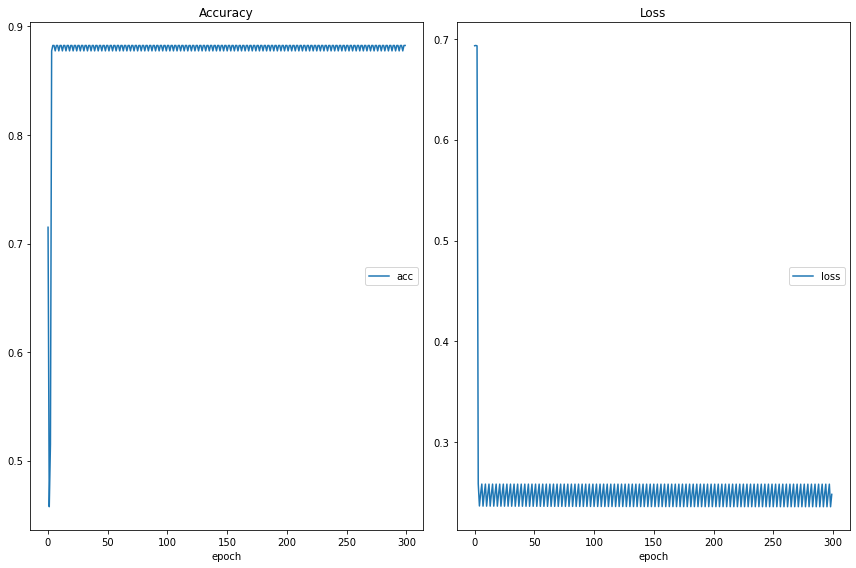

Accuracy
	acc              	 (min:    0.458, max:    0.882, cur:    0.882)
Loss
	loss             	 (min:    0.236, max:    0.693, cur:    0.248)
Accuracy: 90.66666666666666


In [1]:
import numpy as np
from model import *
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
from planar import *
import matplotlib.pyplot as plt

X, Y = sklearn.datasets.make_moons(n_samples=1500, noise=0.05)
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)
# train_X.shape === (nx, m)
# train_Y.shape === (1, m)
# train_X, train_Y = load_planar_dataset(400
# )
train_X = train_X.T
train_Y = train_Y.reshape(1, train_X.shape[1])
test_X = test_X.T
test_Y = test_Y.reshape(1, test_X.shape[1])
# print(train_X.shape, train_Y.shape)
predictions = (
    Model(train_X, train_Y)
    .add_layer({"hidden_unit": 6, "activation": "Relu"})
    .add_layer({"hidden_unit": 1, "activation": "Sigmoid"})
    .train(initalization_method="Random", epoch=10000, learning_rate=0.3)
    .predict(test_X, test_Y)
)


In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model
    # Predict the function value for the whole grid
#     print(xx.ravel(), x_max)
#     Z = model(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()


In [ ]:
plot_decision_boundary(predictions, train_X, train_Y)